In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [7]:
# Dataset is converted to pandas dataframe
dataset = pd.read_csv("95596180-c0da-43ef-b2b3-7172488a1cb0.csv")
dataset[0:10]

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5
5,f,14.25000,171,62.5,112.0
6,f,15.41667,185,59.0,104.0
7,f,11.83333,142,56.5,69.0
8,f,13.33333,160,62.0,94.5
9,f,11.66667,140,53.8,68.5


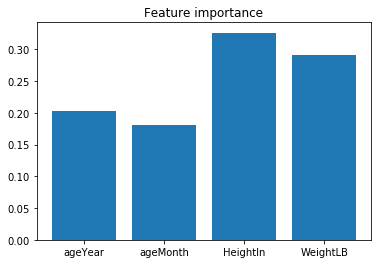

In [8]:
#Feature Selection - 
# Using decision trees the features which contribute better for the classification is chosen.
# Intuitively, Age as a feature may not be usuful in classfying gender. And features ageYear and ageMonth are corelated.
# Result of the decision tree feature importance reflects the intuition above.

raw_dataset = dataset.values
X = raw_dataset[:,1:5]
Y = raw_dataset[:,0]

model = ExtraTreesClassifier()
model.fit(X, Y)
x = np.arange(4)
plt.bar(x, height= model.feature_importances_)
plt.title('Feature importance')
plt.xticks(x, ['ageYear','ageMonth','HeightIn','WeightLB']);
plt.show()

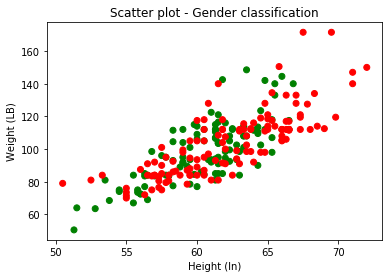

In [9]:
# After choosing the features, Features are plotted for visualization of the distribution.
# Visualization inference : There do not seem to be a concrete decision boundary possible for the visualization.
# So, It will not be possible to make a decisive classification with these available features.
# Any additional features (non co-related) might help.

colors = ('red','green')
dataset['color'] = np.where(dataset['gender']=='f', 'green', 'red')
plt.scatter(x=dataset["HeightIn"],y=dataset["WeightLB"],c=dataset['color'],label=dataset["gender"])
plt.title('Scatter plot - Gender classification')
plt.xlabel('Height (In)')
plt.ylabel('Weight (LB)')
plt.show()

In [10]:
# Features are scaled.

dataset["HeightIn"] = dataset["HeightIn"]/dataset["HeightIn"].max()
dataset["WeightLB"] = dataset["WeightLB"]/dataset["WeightLB"].max()

In [11]:
# custom function to train,test a classifier. Prints the classification report and accuracy.

def classify(model,x_train,y_train,x_test,y_test):
    model.fit(X_train,y_train)
    Y_predicted = model.predict(X_test)
    print "Accuracy :",accuracy_score(y_test,Y_predicted)
    print "\nClassification Report:"
    print classification_report(y_test,Y_predicted)
    return model

In [12]:
# Dataset split - 70/30

trainset,testset = train_test_split(raw_dataset,test_size=0.3,random_state=42)
X_train = trainset[:,3:5]
y_train = trainset[:,0]
X_test = testset[:,3:5]
y_test = testset[:,0]

In [13]:
#  Random forest
model_1 = RandomForestClassifier(n_estimators=12,random_state=42)
rf_model = classify(model_1,X_train,y_train,X_test,y_test)

Accuracy : 0.625

Classification Report:
             precision    recall  f1-score   support

          f       0.56      0.65      0.60        31
          m       0.69      0.61      0.65        41

avg / total       0.63      0.62      0.63        72



In [14]:
# Logistic regression
model_2 = LogisticRegression(max_iter=100,class_weight='balanced')
lr_model = classify(model_2,X_train,y_train,X_test,y_test)

Accuracy : 0.513888888889

Classification Report:
             precision    recall  f1-score   support

          f       0.40      0.26      0.31        31
          m       0.56      0.71      0.62        41

avg / total       0.49      0.51      0.49        72



In [15]:
#  Gaussian Naive Bayes.
model_3 = GaussianNB()
nb_model = classify(model_3,X_train,y_train,X_test,y_test)

Accuracy : 0.527777777778

Classification Report:
             precision    recall  f1-score   support

          f       0.45      0.45      0.45        31
          m       0.59      0.59      0.59        41

avg / total       0.53      0.53      0.53        72



In [19]:
# Ensemble - Voting
clf = VotingClassifier(estimators=[('rf', model_1), ('lr', model_2), ('gnb', model_3)], voting='hard')
ensemble = classify(clf,X_train,y_train,X_test,y_test)

Accuracy : 0.555555555556

Classification Report:
             precision    recall  f1-score   support

          f       0.48      0.42      0.45        31
          m       0.60      0.66      0.63        41

avg / total       0.55      0.56      0.55        72



In [17]:
from sklearn.externals import joblib
joblib.dump(rf_model,"rf_gender_classification.pkl")

['rf_gender_classification.pkl']